In [1]:
# %%capture
# !git clone https://github.com/nikitakapitan/nlphub.git
# !pip install datasets evaluate

# %cd nlphub
# !pip install 

from datasets import load_dataset, Dataset
import nlphub

%load_ext autoreload
%autoreload 2

In [2]:
dataset = load_dataset("narrativeqa")

Found cached dataset narrativeqa (C:/Users/nikit/.cache/huggingface/datasets/narrativeqa/default/0.0.0/daef7ccc51ec258bef464658d11751bb20f033da9b4c219fd84563b3a4af0422)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
if dataset.keys():
  nlphub.get_datasetdict_size(dataset)

In [72]:
subset = Dataset.from_dict(dataset['test'][:5000])

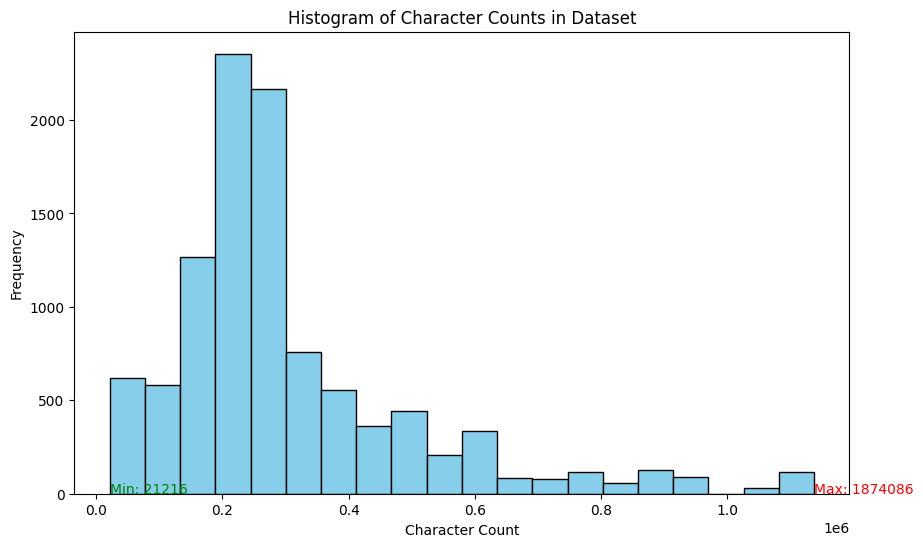

In [74]:
    

df = preprocess_narrative_qa(dataset['test'])

df['char_count'] = df['text'].apply(len)

threshold = df['char_count'].quantile(0.98)
threshold_df = df[df['char_count'] <= threshold]

min_chars = df['char_count'].min()
max_chars = df['char_count'].max()

plt.figure(figsize=(10, 6))
plt.hist(threshold_df['char_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Character Counts in Dataset')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Displaying min and max values
plt.text(x=threshold/max_chars*max_chars, y=0, s=f"Max: {max_chars}", color='red')
plt.text(x=min_chars, y=0, s=f"Min: {min_chars}", color='green')

plt.show()

In [59]:
ds

,text,summary,question,answers
0,<html><title>Pump Up The Volume Transcript</ti...,"Mark Hunter (Slater), a high school student i...",Who is Mark Hunter?,"[He is a high school student in Phoenix., A lo..."
1,<html><title>Pump Up The Volume Transcript</ti...,"Mark Hunter (Slater), a high school student i...",Where does this radio station take place?,"[It takes place in Mark's parents basement. , ..."


In [20]:
ds

,document,question,answers
0,"{'end': 'by Martin Eaves', 'file_size': 54078,...","{'text': 'Who is Mark Hunter?', 'tokens': ['Wh...",[{'text': 'He is a high school student in Phoe...
1,"{'end': 'by Martin Eaves', 'file_size': 54078,...",{'text': 'Where does this radio station take p...,[{'text': 'It takes place in Mark's parents ba...


In [6]:
quantile=0.98
# dataset: DataDict


ds = {}
ds['text'] = subset['document']['text']
ds['summary'] = subset['document']['summary']['text']
ds['question'] = subset['document']['question']['text']
ds['answers'] = []
for ans in subset['document']['answers']:
    ds['answers'].append(ans['text'])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:6                                                                                    │
│                                                                                                  │
│    3                                                                                             │
│    4                                                                                             │
│    5 ds = {}                                                                                     │
│ ❱  6 ds['text'] = subset['document']['text']                                                     │
│    7 ds['summary'] = subset['document']['summary']['text']                                       │
│    8 ds['question'] = subset['document']['question']['text']                                     │
│    9 ds['answers'] = []                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: list indices must be integers or slices, not str

In [ ]:



ds = preprocess_func(dataset)

ds = pd.DataFrame(ds)

ds['char_count'] = ds['text'].apply(len)

threshold = ds['char_count'].quantile(quantile)
sliced_ds = ds[ds['char_count'] <= threshold]

min_chars = ds['char_count'].min()
max_chars = ds['char_count'].max()

plt.figure(figsize=(10, 6))
plt.hist(sliced_ds['char_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Character Counts in Dataset')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Displaying min and max values
plt.text(x=threshold/max_chars*max_chars, y=0, s=f"Max: {max_chars}", color='red')
plt.text(x=min_chars, y=0, s=f"Min: {min_chars}", color='green')

plt.show()

In [5]:
nlphub.vizual.dataset.plot_char_histogram(subset, name='narrativeqa')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 nlphub.vizual.dataset.plot_char_histogram(subset, name='narrativeqa')                        │
│   2                                                                                              │
│                                                                                                  │
│ D:\WORKSPACE\nlphub\nlphub\vizual\dataset.py:17 in plot_char_histogram                           │
│                                                                                                  │
│   14 │   │   'allenai/qasper' : preprocess_qasper,                                               │
│   15 │   │   │   │   │      }[name]                                                              │
│   16 │                                                                                           │
│ ❱ 17 │   ds = preprocess_func(dataset)                                                           │
│   18 │                                                                                           │
│   19 │   ds = pd.DataFrame(ds)                                                                   │
│   20                                                                                             │
│                                                                                                  │
│ D:\WORKSPACE\nlphub\nlphub\vizual\dataset.py:50 in preprocess_narrative_qa                       │
│                                                                                                  │
│   47 │   'answers' : List[str]}                                                                  │
│   48 │   """                                                                                     │
│   49 │   ds = {}                                                                                 │
│ ❱ 50 │   ds['text'] = dataset['document']['text']                                                │
│   51 │   ds['summary'] = dataset['document']['summary']['text']                                  │
│   52 │   ds['question'] = dataset['document']['question']['text']                                │
│   53 │   ds['answers'] = []                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: list indices must be integers or slices, not str

In [ ]:
nlphub.vizual.dataset.plot_char_histogram(dataset)

In [ ]:
dataset['train'][0]

In [ ]:
dataset['train'].features